# Tutorial: Creating a Generative QA Pipeline with Retrieval-Augmentation

#### Level: Intermediate

#### Nodes Used: `InMemoryDocumentStore`, `BM25Retriever`, `PromptNode`, `PromptTemplate`

In [1]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.INFO)

In [2]:
from haystack.document_stores import InMemoryDocumentStore

document_store = InMemoryDocumentStore(use_bm25=True)

INFO - haystack.modeling.utils -  Using devices: CUDA:0 - Number of GPUs: 1


In [3]:
from datasets import load_dataset

dataset = load_dataset("bilgeyucel/seven-wonders", split="train")

document_store.write_documents(dataset)

Updating BM25 representation...: 100%|█████████████████████████████████| 151/151 [00:00<00:00, 14269.88 docs/s]


In [4]:
from haystack.nodes import BM25Retriever

retriever = BM25Retriever(
    document_store=document_store, 
    top_k=2
)

In [5]:
from haystack.nodes import PromptNode, PromptTemplate, AnswerParser

rag_prompt = PromptTemplate(
    prompt="""Synthesize a comprehensive answer from the following text for the given question.
                             Provide a clear and concise response that summarizes the key points and information presented in the text.
                             Your answer should be in your own words and be no longer than 50 words.
                             \n\n Related text: {join(documents)} \n\n Question: {query} \n\n Answer:""",
    output_parser=AnswerParser(),
)

prompt_node = PromptNode(
    model_name_or_path="google/flan-t5-large", 
    default_prompt_template=rag_prompt
)

INFO - haystack.modeling.utils -  Using devices: CUDA:0 - Number of GPUs: 1


In [6]:
from haystack.pipelines import Pipeline

pipe = Pipeline()

pipe.add_node(
    component=retriever, 
    name="retriever", 
    inputs=["Query"]
)

pipe.add_node(
    component=prompt_node, 
    name="prompt_node", 
    inputs=["retriever"]
)

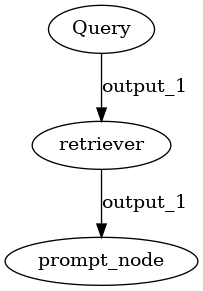

In [7]:
pipe_png = "images/pipeline_generative_retrieval_augmentation.png"

pipe.draw(pipe_png)

from IPython.display import Image, display
display(Image(filename=pipe_png))

In [8]:
output = pipe.run(
    query="What does Rhodes Statue look like?"
)

print(output["answers"][0].answer)

Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
WARNING - haystack.nodes.prompt.invocation_layer.hugging_face -  The prompt has been truncated from 560 tokens to 412 tokens so that the prompt length and answer length (100 tokens) fit within the max token limit (512 tokens). Shorten the prompt to prevent it from being cut off


The Colossus was a mythical figure, and the mythical figure is the mythical Colossus.
